# Aerofit: Treadmill Buyer Profile

**Leng Yang**

**Last Updated: 2/4/25**

## Assignment

Project Source: https://platform.stratascratch.com/data-projects/treadmill-buyer-profile

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

__Product Portfolio__:

* The KP281 is an entry-level treadmill that sells for $1,500;

* The KP481 is for mid-level runners and sells for $1,750;

* The KP781 treadmill is having advanced features and it sells for $2,500.

## Data Description

The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

* `Product` - product purchased: KP281, KP481, or KP781
* `Age` - in years
* `Gender` - male/female
* `Education` - in years
* `MaritalStatus` - single or partnered
* `Usage` - the average number of times the customer plans to use the treadmill each week
* `Fitness` - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
* `Income` - annual income in US dollars
* `Miles` - the average number of miles the customer expects to walk/run each week

<BR><BR>

### Data Exploration

In [1]:
#Load in necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load in data and view dataframe information
df = pd.read_csv('./datasets/aerofit_treadmill_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [179]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [37]:
#Descriptive statistics separated by each product
df.groupby('Product').describe().T

Product                 KP281         KP481          KP781
Age       count     80.000000     60.000000      40.000000
          mean      28.550000     28.900000      29.100000
          std        7.221452      6.645248       6.971738
          min       18.000000     19.000000      22.000000
          25%       23.000000     24.000000      24.750000
          50%       26.000000     26.000000      27.000000
          75%       33.000000     33.250000      30.250000
          max       50.000000     48.000000      48.000000
Education count     80.000000     60.000000      40.000000
          mean      15.037500     15.116667      17.325000
          std        1.216383      1.222552       1.639066
          min       12.000000     12.000000      14.000000
          25%       14.000000     14.000000      16.000000
          50%       16.000000     16.000000      18.000000
          75%       16.000000     16.000000      18.000000
          max       18.000000     18.000000      21.000000
Usage     count     80.000000     60.000000      40.000000
          mean       3.087500      3.066667       4.775000
          std        0.782624      0.799717       0.946993
          min        2.000000      2.000000       3.000000
          25%        3.000000      3.000000       4.000000
          50%        3.000000      3.000000       5.000000
          75%        4.000000      3.250000       5.000000
          max        5.000000      5.000000       7.000000
Fitness   count     80.000000     60.000000      40.000000
          mean       2.962500      2.900000       4.625000
          std        0.664540      0.629770       0.667467
          min        1.000000      1.000000       3.000000
          25%        3.000000      3.000000       4.000000
          50%        3.000000      3.000000       5.000000
          75%        3.000000      3.000000       5.000000
          max        5.000000      4.000000       5.000000
Income    count     80.000000     60.000000      40.000000
          mean   46418.025000  48973.650000   75441.575000
          std     9075.783190   8653.989388   18505.836720
          min    29562.000000  31836.000000   48556.000000
          25%    38658.000000  44911.500000   58204.750000
          50%    46617.000000  49459.500000   76568.500000
          75%    53439.000000  53439.000000   90886.000000
          max    68220.000000  67083.000000  104581.000000
Miles     count     80.000000     60.000000      40.000000
          mean      82.787500     87.933333     166.900000
          std       28.874102     33.263135      60.066544
          min       38.000000     21.000000      80.000000
          25%       66.000000     64.000000     120.000000
          50%       85.000000     85.000000     160.000000
          75%       94.000000    106.000000     200.000000
          max      188.000000    212.000000     360.000000

In [43]:
#Counts for each marital status and gender for each product
df.groupby('Product')[['Gender','MaritalStatus']].value_counts().unstack()

MaritalStatus   Partnered  Single
Product Gender                   
KP281   Female         27      13
        Male           21      19
KP481   Female         15      14
        Male           21      10
KP781   Female          4       3
        Male           19      14

**Observation**

* `Age` - similar average age across all product groups
* `Gender`
    * KP281: equal split between genders
    * KP481: slightly higher number of male customers
    * KP781: much higher number of male customers
* `Education` - similar across all groups
* `MaritalStatus` - higher number of partnered customers across all product groups
* `Usage` - KP781 slighter higher usage (2 days more), KP281 and KP481 have similar usage
* `Fitness` - KP781 customers have  a slightly higher rating (1.6 points more), KP281 and KP481 customers have similar rating
* `Income` - KP781 customers have a higher income, KP281 and KP481 customers have similar income
* `Miles` - KP781 customers have a slighter higher usage, KP281 and KP481 customers have similar usage

#### Age

There is a similar distribution across all product groups with each displaying a right-skewed distribution. The most frequent age group across all products is between `24-26` years old. Additionally most of the customer base appear to be under 30 years old.

''

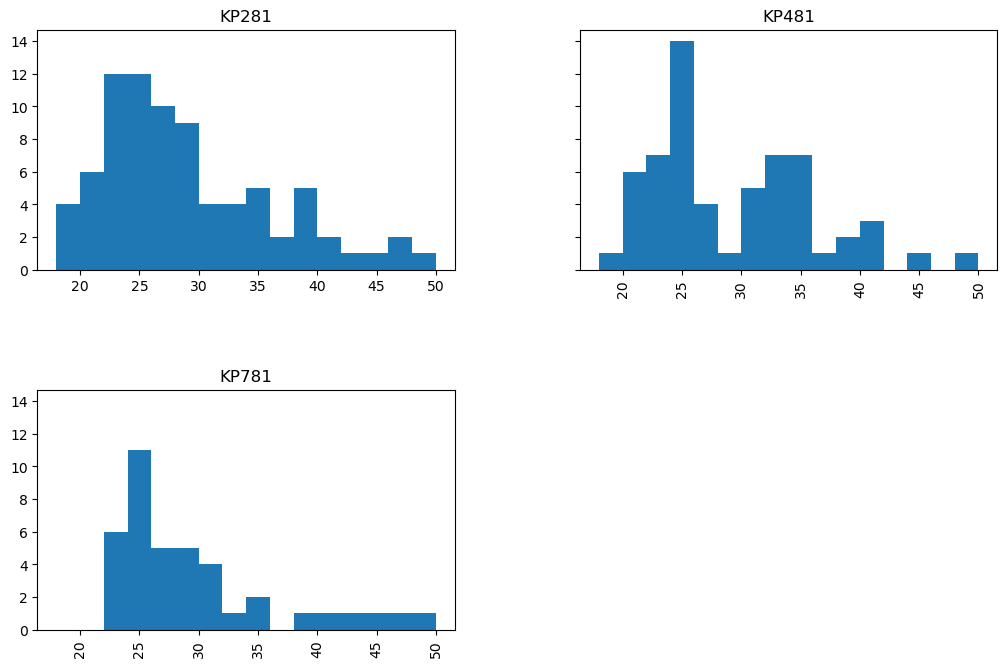

In [13]:
#Histogram of age for each product group
axes = df.hist(column='Age', by='Product', figsize=[12,8], sharex=True, sharey=True, bins=range(18,52,2))

for ax in axes.ravel():
    ax.tick_params(axis='x', labelbottom=True)
;

#### Gender

Again, the KP281 and KP481 models have a nearly equal split gendered customer base. The KP781 model has a more male-dominated customer base.

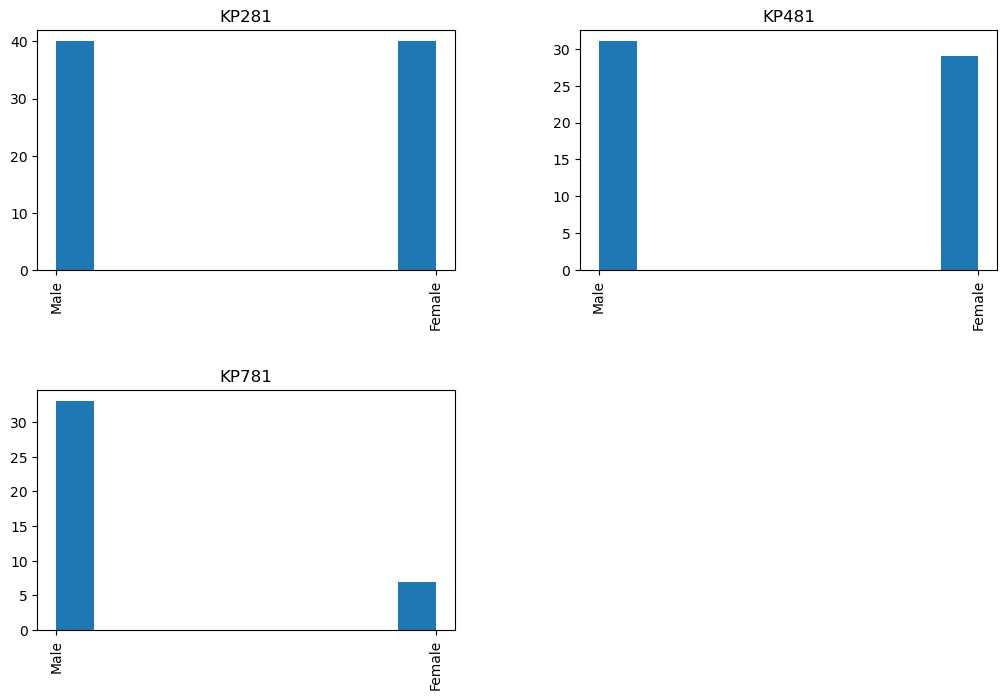

In [140]:
df.hist(column='Gender', by='Product', figsize=[12,8]);

#### Education

KP281 and KP481 users have similar education levels. KP781 users are slightly higher educated.

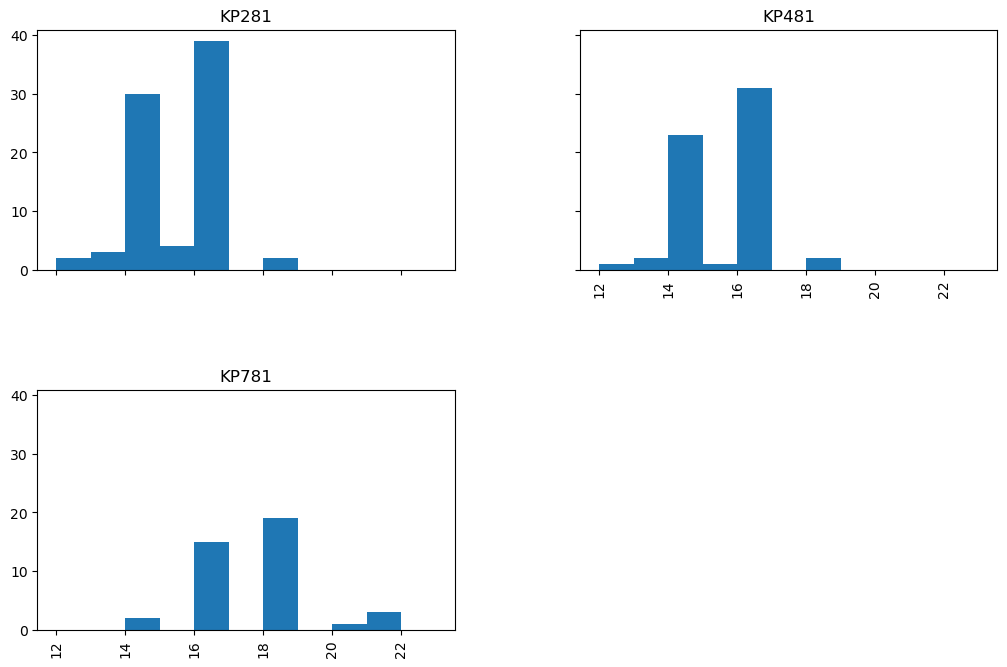

In [15]:
df.hist(column='Education', by='Product', figsize=[12,8], sharex=True, sharey=True, bins=range(12,24));

#### Marital Status

Across all products, most customers have a partner.

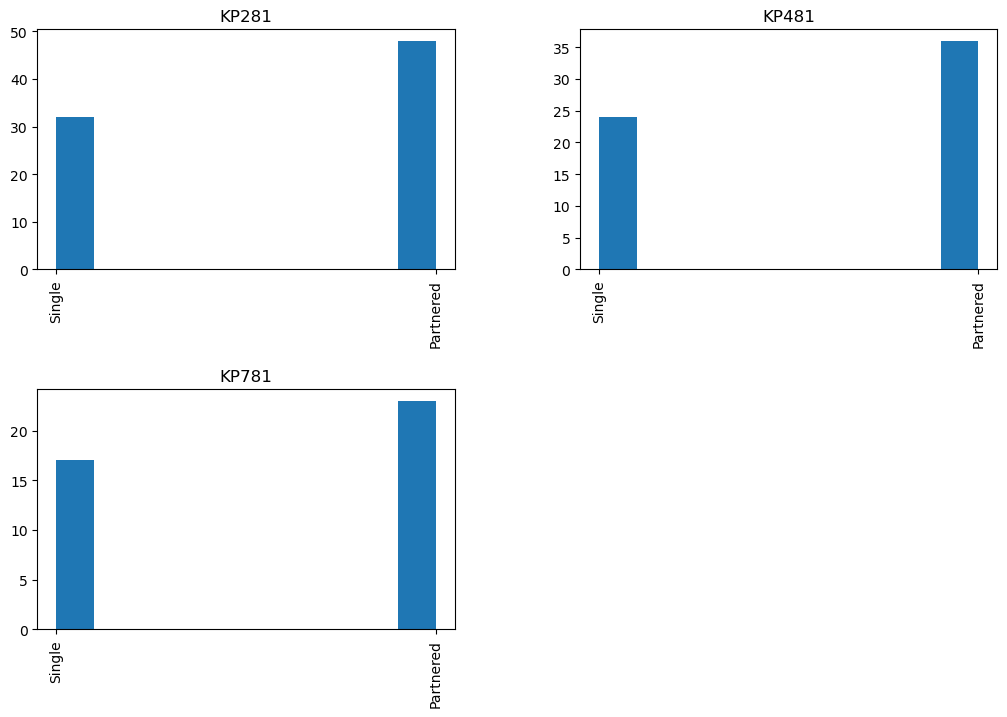

In [148]:
df.hist(column='MaritalStatus', by='Product', figsize=[12,8]);

#### Usage

KP281 and KP481 product users use the treadmills less than KP781 product users; most frequently  at 3 days vs 4 days, respectively.

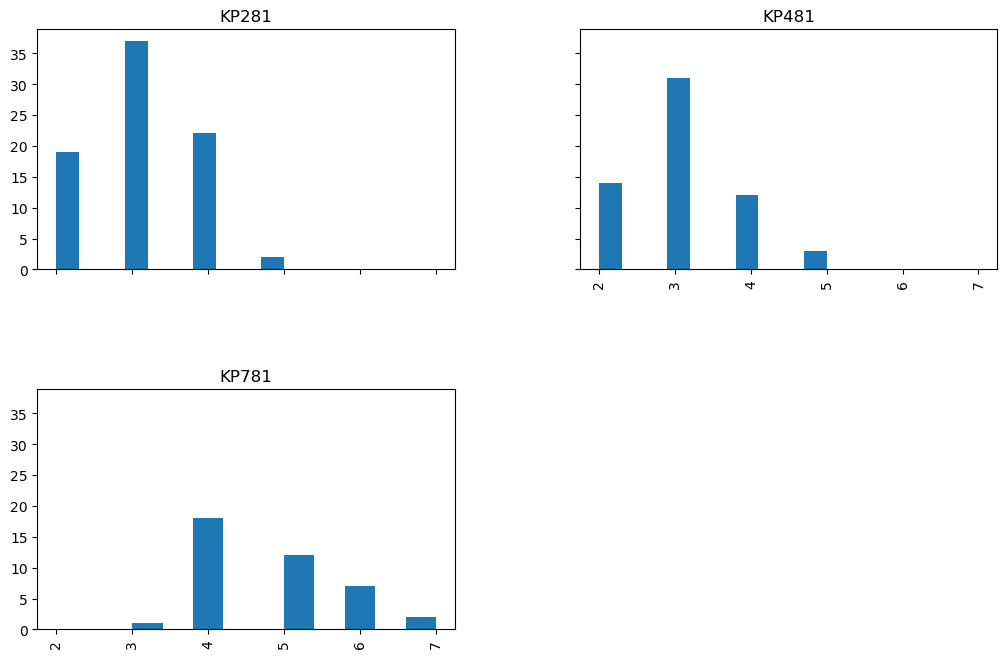

In [151]:
df.hist(column='Usage', by='Product', figsize=[12,8], sharex=True, sharey=True);

#### Fitness

KP281 and KP481 product users rate their fitness levels than KP781 product users; most frequently at a rating 3 vs 5, respectively.

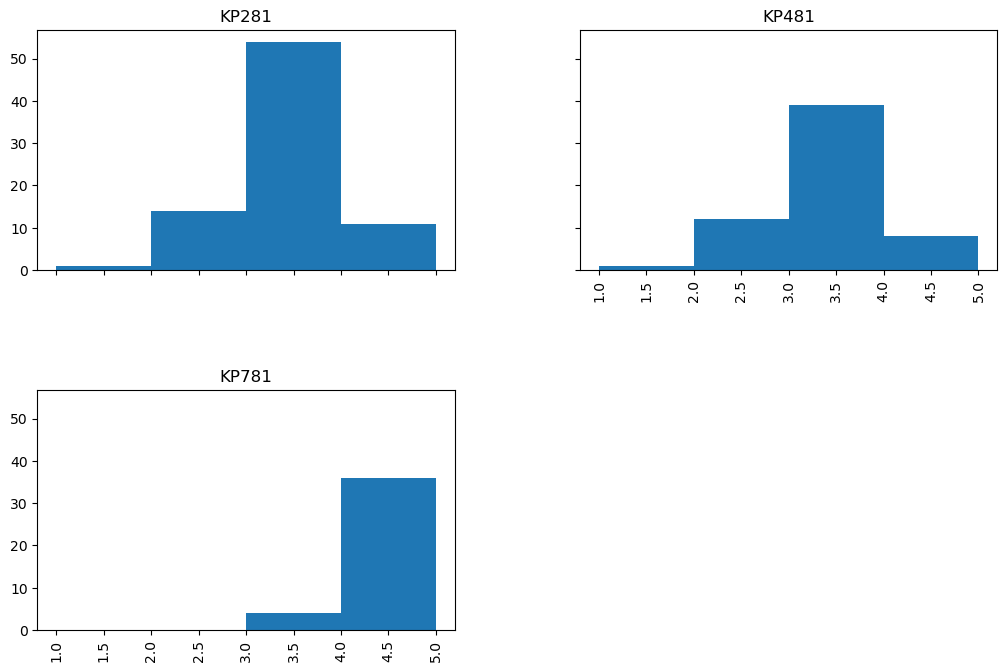

In [21]:
df.hist(column='Fitness', by='Product', figsize=[12,8], sharex=True, sharey=True, bins=range(1,6));

#### Income

KP281 and KP481 product users have a lower income when compared to KP781 users. The first two groups most frequently have an income between \\$40,000 to $60,000.

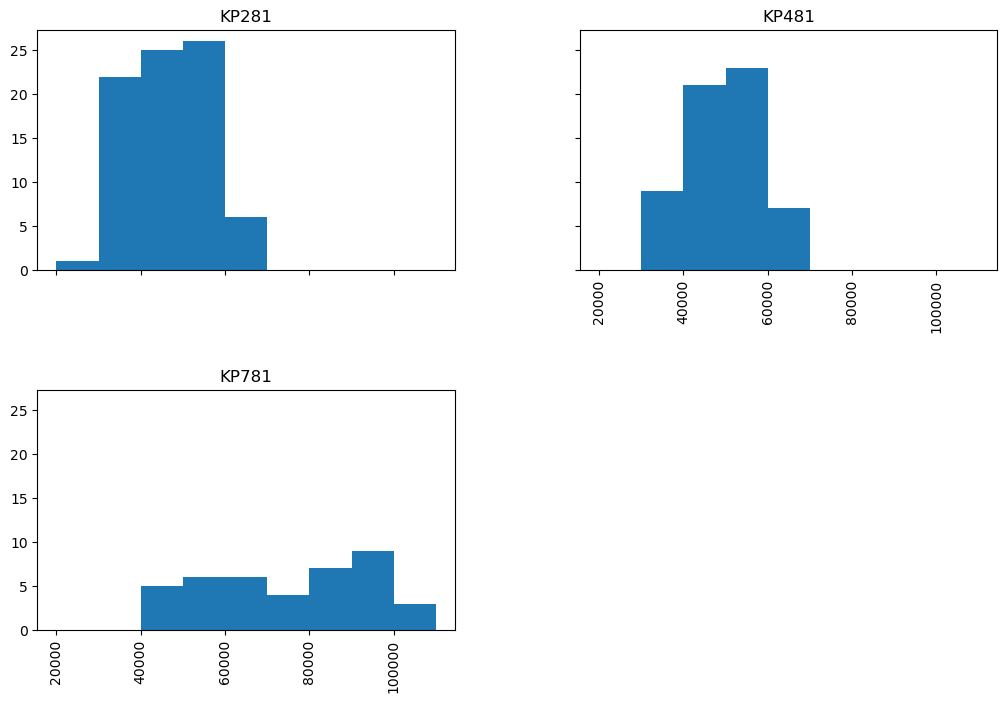

In [166]:
df.hist(column='Income', by='Product', figsize=[12,8], sharex=True, sharey=True, bins=range(20000,120000,10000));

#### Miles

KP281 and KP481 users walk/run on the treadmills at a much lower frequency and KP781 product users.

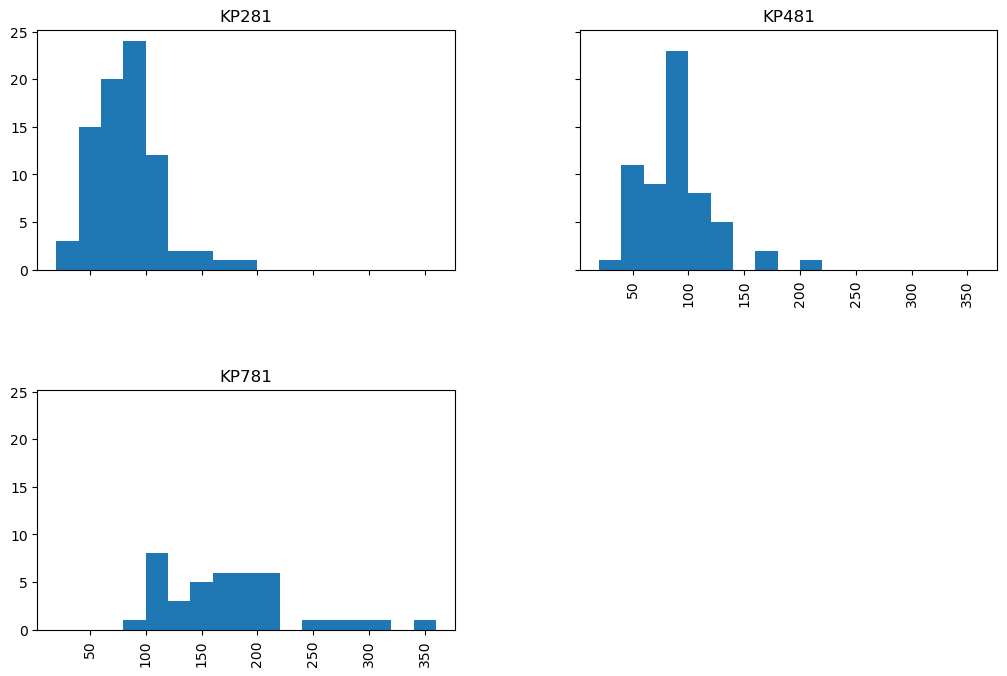

In [170]:
df.hist(column='Miles', by='Product', figsize=[12,8], sharex=True, sharey=True, bins=range(20,380,20));

<BR>

**Insights**

* `KP281` is the most popular product, accounting for 44% of the customers.
* `75%` of the customers are under the age of 33, indicating a young customer base.
* `KP781` users are higher educated, have higher weekly usage, have a higher fitness rating, have a higher income, and expect to walk/run more miles per week.
* Over half of the customer base have a partner.

**Recommendations**
* Market the `KP281` and `KP481` models are the more affordable models.
* Market the `KP781` model as the higher-end, premium model.
* Conduct market research into possibly offerring deals for buying treadmills in pairs as most of the customer base have partners.